# Para simulación
- Pruebas de tiempo de la simulación para distintos tamaños de red y distinto número de autos (elapse). 
    - Primero mantener constante el numero de autos y crecer la red hasta 100x100 <input type="checkbox" checked>
    - Con la red de 100x100 empezar a aumentar el número de autos <input type="checkbox" checked>


- Graficar log-log con un exponente <input type="checkbox" checked>

In [1]:
using Plots, BenchmarkTools

include("funciones_de_red.jl")
include("objetos.jl")
include("dinamica_conductores.jl")
include("animaciones.jl")

plot_digraph (generic function with 1 method)

In [2]:
function generate_auto(m,t,red)
    o = rand(1:m)
    d = collect(1:m)
    splice!(d,o)
    d = d[rand(1:end)]
    return auto(o,d,t,0.25,red)
end

generate_auto (generic function with 1 method)

In [3]:
function object_generation(k)
    m = k^2
    SquareNet, position_array, dist_matrix = SquareDiGraph(k)
    city_matrix = zeros(m,m,4)
    f = x -> [speed(i,j,x) for i in 1:length(x),j in 1:length(x)]
    city_matrix[:,:,1] = dist_matrix./f(position_array)
    city_matrix[:,:,2] = dist_matrix.*3/5
    city_matrix[:,:,4] = BPR.(city_matrix[:,:,1], city_matrix[:,:,3],city_matrix[:,:,2])
    red_cuadrada=network(SquareNet,position_array,city_matrix)
    
    plot_digraph(SquareNet,position_array)
    autos = [generate_auto(m,t,red_cuadrada) for t in collect(0.5:0.321:150.)]
    return(red_cuadrada, autos)
end

object_generation (generic function with 1 method)

In [4]:
simulation_times = []
building_times = []

Any[]

In [5]:
for k in 5:10:55
    print("Red de ",k, " nodos por lado", "\n")
    t1 = @elapsed red_cuadrada, autos = object_generation(k)
    print("Generation time: ", t1,"\n")
    t2 = @elapsed simulacion!(0.,red_cuadrada, autos,true)
    print("1D simulation time: ", t2,"\n")
    push!(building_times, t1)
    push!(simulation_times, t2)
end

Red de 5 nodos por lado
Generation time: 4.913712083
1D simulation time: 2.020508757
Red de 15 nodos por lado
Generation time: 0.840878942
1D simulation time: 22.782311685
Red de 25 nodos por lado
Generation time: 8.400696923
1D simulation time: 193.225221315
Red de 35 nodos por lado
Generation time: 45.899193718
1D simulation time: 836.738727078
Red de 45 nodos por lado
Generation time: 177.464408083
1D simulation time: 2453.930668431
Red de 55 nodos por lado
Generation time: 623.172320982
1D simulation time: 6357.817325938


In [ ]:
b_times = [4.913712083, 0.840878942, 8.400696923, 45.899193718, 177.464408083, 623.172320982]
s_times = [2.020508757, 22.782311685, 193.225221315, 836.738727078, 2453.930668431, 6357.817325938]

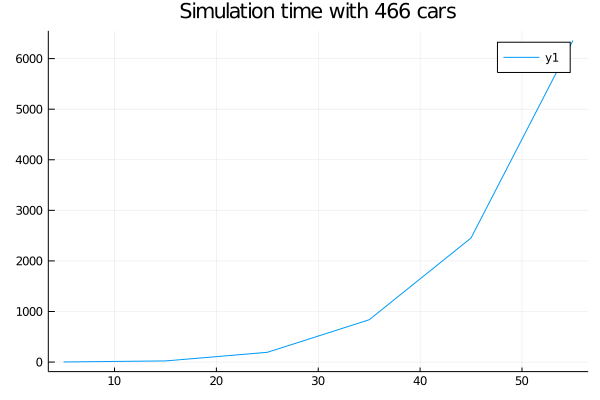

In [6]:
fig = plot(5:10:55, simulation_times, title = "Simulation time with 466 cars")

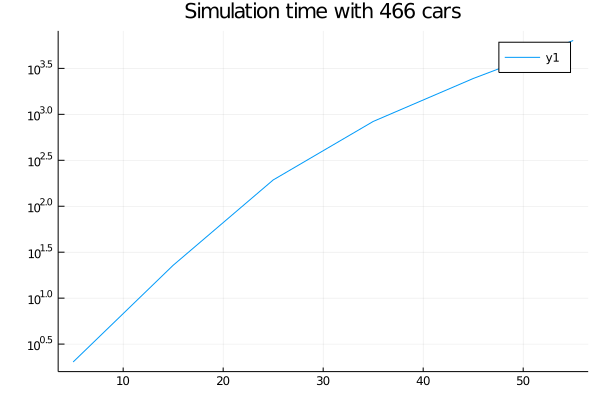

In [7]:
fig2 = plot(5:10:55, simulation_times, title = "Simulation time with 466 cars", yaxis=:log)

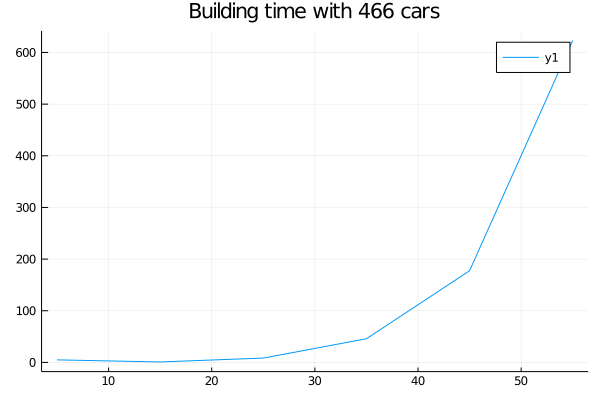

In [8]:
fig = plot(5:10:55, building_times, title = "Building time with 466 cars")

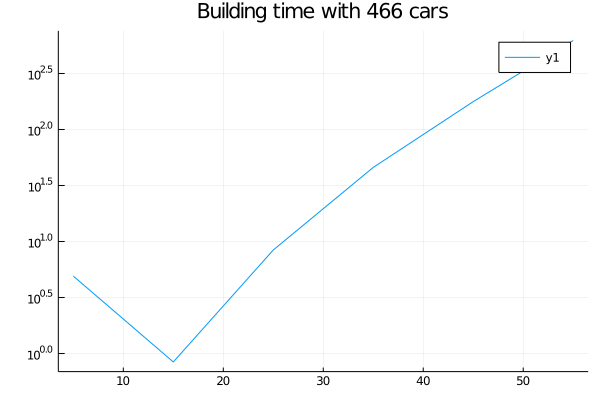

In [9]:
fig2 = plot(5:10:55, building_times, title = "Building time with 466 cars", yaxis=:log)

In [4]:
simulation_times2 = []
building_times2 = []

Any[]

In [5]:
for num in 100:200:1000
    k = 50
    m = k^2
    print(num,"\n")
    t1 = @elapsed red_cuadrada, autos = object_generation(k)
    print("Generation time: ", t1,"\n")
    t2 = @elapsed simulacion!(0.,red_cuadrada, autos,true)
    print("1D simulation time: ", t2,"\n")
    push!(building_times2, t1)
    push!(simulation_times2, t2)
end

100
Generation time: 447.145733567
1D simulation time: 4728.798715329
300
Generation time: 418.175651151
1D simulation time: 4613.849852612
500
Generation time: 385.473829435
1D simulation time: 4447.476604458
700
Generation time: 257.0536427
1D simulation time: 11711.467107465
900
Generation time: 245.798345519
1D simulation time: 14117.870137977


In [6]:
b_times2 = [447.145733567, 418.175651151, 385.473829435, 257.0536427, 245.798345519]
s_times2 = [4728.798715329, 4613.849852612, 4447.476604458, 11711.467107465, 14117.870137977]

5-element Array{Float64,1}:
  4728.798715329
  4613.849852612
  4447.476604458
 11711.467107465
 14117.870137977

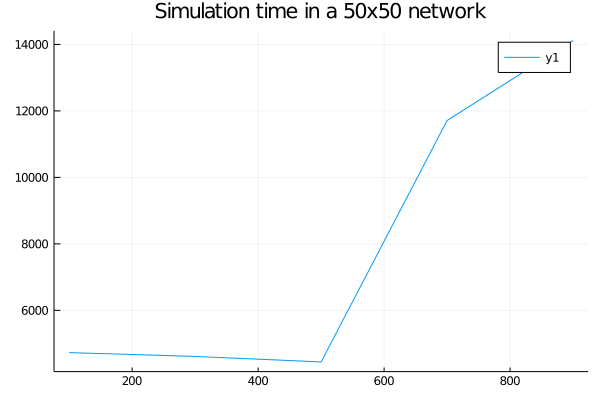

In [8]:
fig = plot(100:200:1000, s_times2, title = "Simulation time in a 50x50 network")

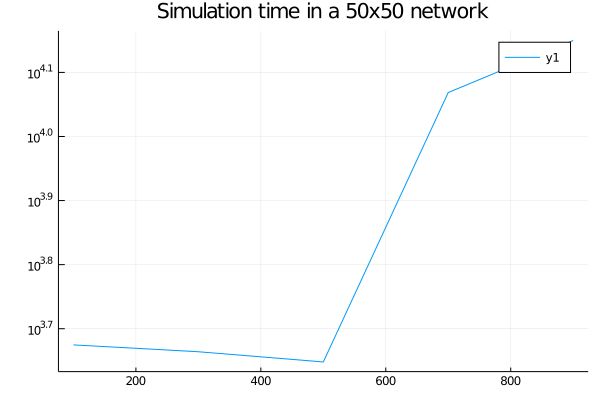

In [10]:
fig2 = plot(100:200:1000, s_times2, title = "Simulation time in a 50x50 network", yaxis=:log)
